# Time Series & LV Plot

## Letter Value (LV) Plot

As always, let us begin by understanding what this plot is and how can it be helpful for us; before we dig deeper into plotting these with some data. So, **Letter value (LV) plots** are **non-parametric estimates** of the *distribution of a dataset*, quite similar to **Box Plot**. *LV plots* are also pretty similar to **Violin plots** but excluding the need to fit a **Kernel Density estimate**. Thus, LV plots are fast to generate, directly interpretable in terms of the distribution of data, and easy to understand.

In **Statistical modelling**, the general idea of *non-parametric estimation* is to use the *past information* that most closely resembles the *present*, without establishing any concrete prediction model. Suppose we need to predict future returns of a series, that contains enough information in it's prior data to predict the next value, but we don't know how much information out of this dataset is non-disposable for prediction; and till what time-stamp should we go back and use this data. There is always a risk of *over-fitting* as well.

This is where, **non-parametric estimation** comes in handy with a *smooting window parameter* that provide bands around our set of observations in a series with *autoregression*. We focus on the value that follows *each block* (where each block has a *fixed set of observations previous to today as per autoregression order*) and compute *weighted average*. More similar these blocks, more weight is allocated to next observation. By the way, these *weights* are determined with our *smoothing function* (also termed as kernel); and there are multiple smoothing functions to choose from like *Uniform*, *Gaussian*, *Dirichlet*, etc. (though the most common one is *Gaussian*).

My sole purpose of taking you through such *statistical background* of each plot and related concepts, is just to ensure that if someday, a fine gentleman in an interview tries to test your knowledge beyond your programming/coding skills, you should be able to answer at least upto an extent, even if you don't have a Stats background. Honestly, even if you could just mention the keywords, it kind of assures an interviewer or a manager, that they have assigned their task to someone who knows what they're doing.

Let us now plot a simple **LV Plot** and then try to find out if we have any *optional parameter* available that we haven't encountered till now (although that shouldn't be the case). So let us begin by quickly importing our dependencies and setting the aesthetics for future use:

In [1]:
# Importing intrinsic libraries:
import numpy as np
import pandas as pd
np.random.seed(44)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid", palette="rainbow")
import warnings
warnings.filterwarnings("ignore")


In [2]:

# Let us also get tableau colors we defined earlier:
tableau_20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
         (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
         (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
         (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
         (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scaling above RGB values to [0, 1] range, which is Matplotlib acceptable format:
for i in range(len(tableau_20)):
    r, g, b = tableau_20[i]
    tableau_20[i] = (r / 255., g / 255., b / 255.)

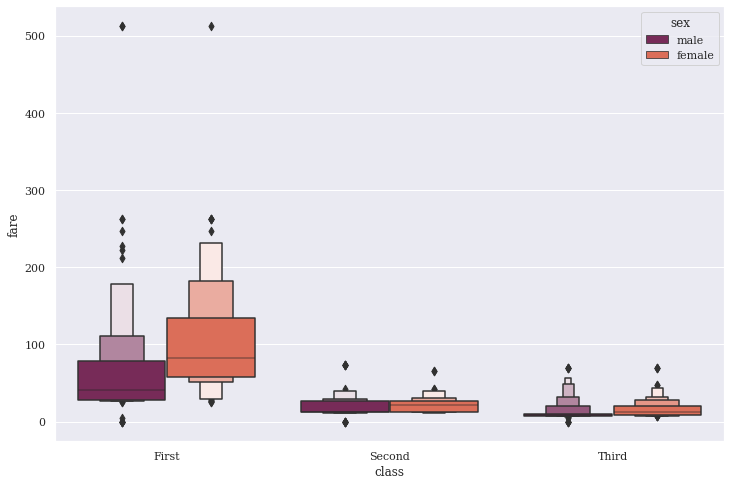

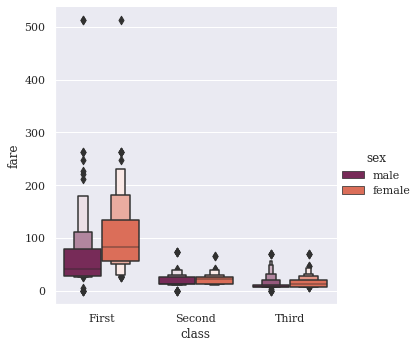

In [3]:
# Loading built-in Tips dataset:
titanic = sns.load_dataset("titanic")

# Setting Plot size and font style:
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['font.family'] = "serif"

# Plotting a basic LV Plot:
sns.boxenplot(x="class", y="fare", hue="sex", data=titanic, palette="rocket")
sns.catplot(x="class", y="fare", hue="sex", data=titanic, palette="rocket", kind="boxen")

This beauty looks quite similar to **Box plot**, but more closely follow the principles, that governed **John Wilder Tukey's conventional boxplot**. A good to know fact, [John Tukey](https://en.wikipedia.org/wiki/John_Tukey) was the *founding chairman of the Princeton statistics department* and had been decorated with *numerous awards and honors*. His original *Box plot* in 1977 did wonders with small-sized datasets, conveying rough information about the central 50% and the extent of data. I shall also attach link to an information-rich [paper by Hadley & Karen](http://vita.had.co.nz/papers/letter-value-plot.pdf) about their study on *LV Plots*.

As we notice in our plot, the whiskers from Box plot have been replaced with a variable number of letter values, selected solely based on the uncertainty associated with each non-parametric estimate and hence on the number of observations. Any values outside the most extreme letter value are displayed individually. These two modifications reduce the number of “outliers”
displayed for large data sets, and make letter-value plots extremely useful over a much wider range of data sizes. But they also remain true to the spirit of boxplots by displaying only actual observations from the data sample, thus remaining free of tuning parameters. I am sure you can observe these skewed tails.

Let me plot this one another dataset, though the datasets that we are using aren't really huge, but shall still give us a fair idea of distribution:

<AxesSubplot:xlabel='day', ylabel='total_bill'>

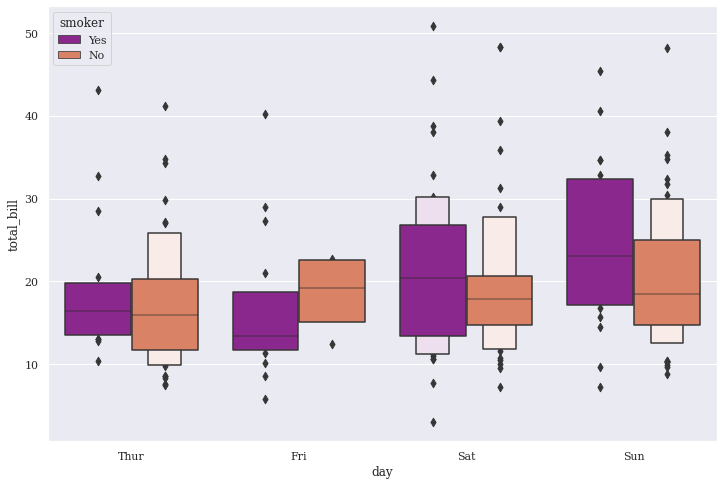

In [4]:
# Loading built-in Tips dataset:
tips = sns.load_dataset("tips")

sns.boxenplot(x="day", y="total_bill", hue="smoker", data=tips, palette="plasma")

*Tips dataset* seems to show much *better distribution* than *Titanic* so let us stick to this. We do notice that as the data chunk keeps changing, the boxes accordingly represent the distribution. Also, the *outliers* have been limited at the end of each tail for respective `days`, thus displaying only those `Total bill` values that have approximately *95% Confidence Intervals*, and do not overlap the successive letter values.

Let us now run through the parameters offered by Seaborn:
`seaborn.lvplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, k_depth='proportion', linewidth=None, scale='exponential', outlier_prop=None, ax=None)`

Nice! So apart from regular params, we have three new *optional parameters* offered by Seaborn team to help us visualize data better: We have:
- `k_depth` that indicates **number of boxes**, and by extension number of percentiles, to draw. Here, each box makes different assumptions about the number of outliers and leverages different statistical properties. The paper by Hadley & Karen that I mentioned earlier details available options. By default, Seaborn sets it to `proportion`, whereas we may also switch to conventional `tukey` and `trustworthy`.
- Secondly we have `scale` parameter that decides the method to use for **width of the letter value boxes**, though all of them visually give similar results. By default it is set to `exponential` where our plot uses the proportion of data not covered. Alternatively, we may choose `linear` to reduce width by a constant linear factor; or select `area`, being proportional to the percentage of data covered.
- Finally we have `outlier_prop` that is used in conjuction with `k_depth` parameter, thus representing **proportion of data believed to be Outliers**. Ideally, it defaults to `0.007` as a proportion of Outliers.

Time to observe how these optional parameters can create a difference in our plots so let us start by adding them one by one:

<AxesSubplot:xlabel='day', ylabel='total_bill'>

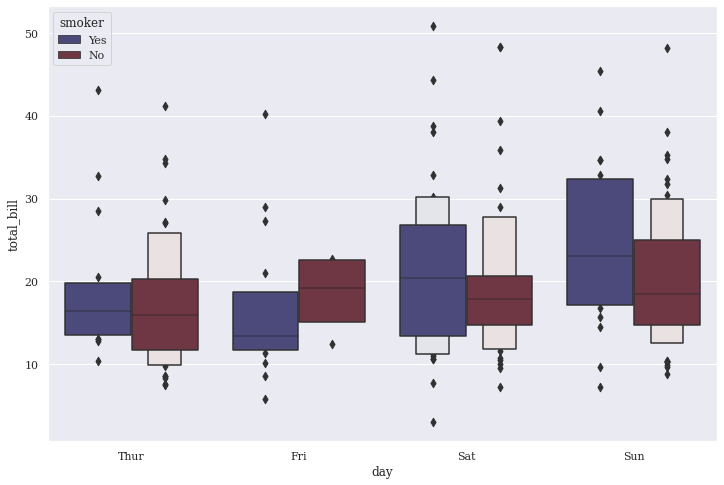

In [5]:
sns.boxenplot(x="day", y="total_bill", hue="smoker", data=tips, palette="icefire", k_depth="tukey", outlier_prop=0.007)

A lot changed in our plot by adding those parameters so let us infer what actually made a difference and how. We still have same data points with `Total Bill` being generated by customers on respective `days`, that gets further segregated by their `Smoking` habit. But now we have fewer boxes representing our data in a much generalized manner because Tukey method isn't able to make ample assumptions with blocks of data points being passed on to it. In turn, even the count of Outliers being displayed increase. This vividly concretes our opinion on **Tukey principles not being efficient on larger datasets**, because `Tips` dataset certainly has over 200+ records.

Let us try to **scale** it now and see if that makes a difference. Simultaneously, we shall also try to redefine our Outlier proportion to a lower value:

<AxesSubplot:xlabel='day', ylabel='total_bill'>

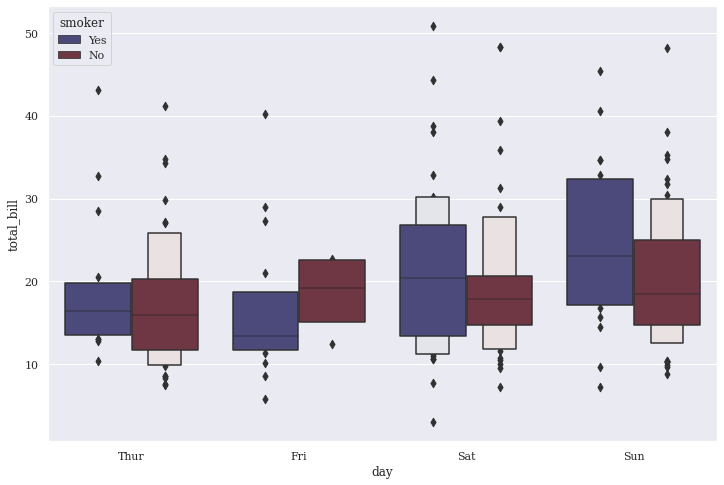

In [6]:
# Trying to linearly adjust box width:
sns.boxenplot(x="day", y="total_bill", hue="smoker", data=tips, palette="icefire", k_depth="tukey", 
           scale="linear", outlier_prop=0.010)

**Tukey principles** just don't seem to be working well for us, so let us give a last shot with `trustworthy` param: 

<AxesSubplot:xlabel='day', ylabel='total_bill'>

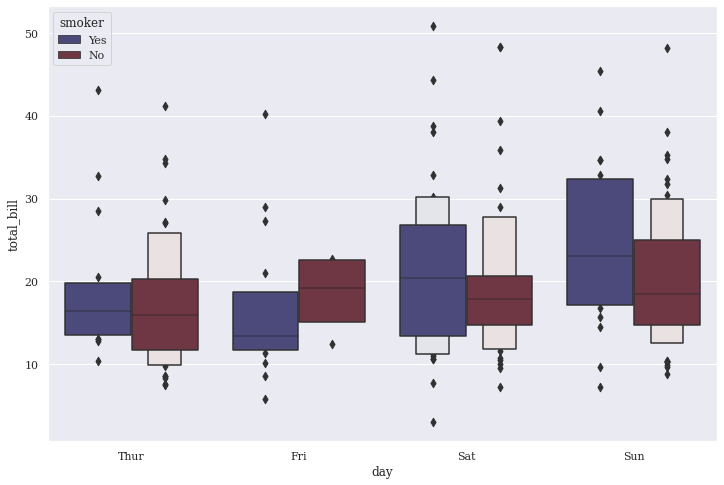

In [7]:
#sns.lvplot(x="day", y="total_bill", hue="smoker", data=tips, palette="icefire", k_depth="trustworthy", 
           #scale="linear", outlier_prop=0.005)

# Final shot with defaults:
sns.boxenplot(x="day", y="total_bill", hue="smoker", data=tips, palette="icefire", scale="linear", outlier_prop=0.005)

*Default parameter* here, seems to fetch us what we really wanted, i.e. distributions plotted with boxes as per spike in `total_bill`. My primary agenda was just to play around with parameters to show you distribution disparity aesthetically with each parameter variation. Now, let us also try *mixing our LV Plot* with some other plot:

<AxesSubplot:xlabel='day', ylabel='total_bill'>

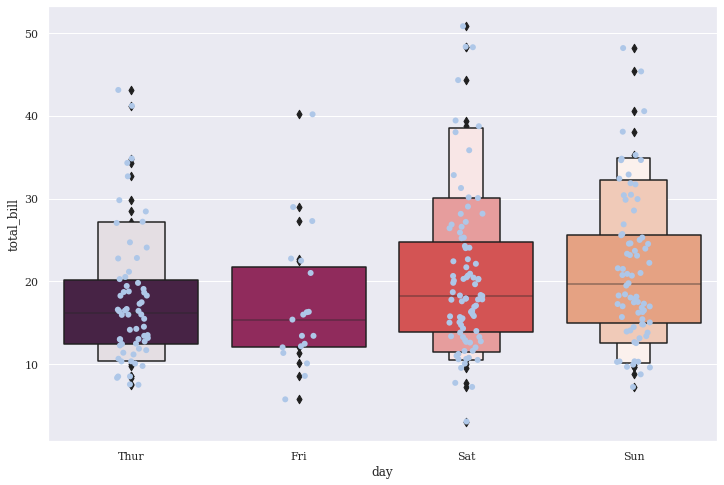

In [8]:
sns.boxenplot(x="day", y="total_bill", data=tips, palette="rocket")
sns.stripplot(x="day", y="total_bill", data=tips, size=6, jitter=True, color=tableau_20[1])

This combination looks pretty good. Generally, **Strip plots** are very well suited for such mixing to make our visualizations information-rich. 

Sticking to our routine, now we should get our **Letter Value plot** further subdivided into *sub-plots*: 

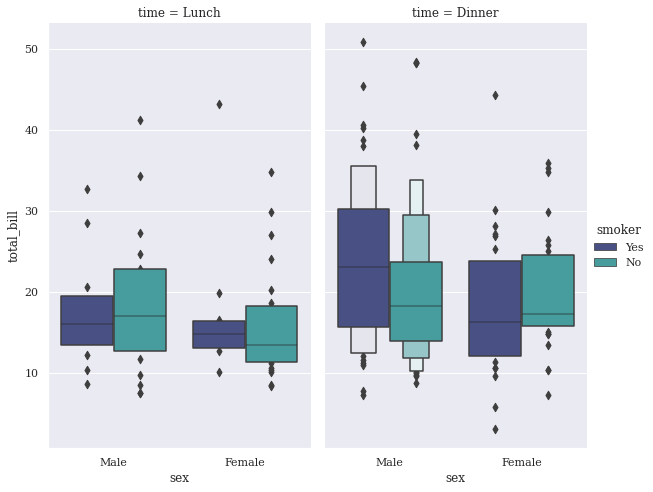

In [9]:
sns.factorplot(x="sex", y="total_bill", hue="smoker", col="time", data=tips, palette ="mako", kind="boxen", size=7, aspect=.6);

## Time-Series Plot

Please do remember that **Letter Value plot** takes all the data into consideration while plotting, so in general use if you don't want that, it is better to stick with **LM Plot** or **Reg Plot**, that we discussed in previous section. Or else, if you want to take a custom track, you would have to reinvent the wheel by creating Custom **PatchCollection** yourself. Moving on, finally we have our topic of interest, i.e. **<span style="color:red">"Time-Series Plot"</span>**.

So, a **Time series** is a *series of data points* that are *indexed* (or even *listed* or *graphed*) in order of time intervals. Most commonly, a time series is a sequence, taken at successive, equally spaced intervals in time. Thus, it is observed to be a sequence of *discrete-time* data. Very often, Time series data is plotted via **Line Charts**, and is commonly used in statistical domain, along with any other domain of *Applied science and engineering* which involves [Temporal measurements](https://en.wikipedia.org/wiki/Temporal_resolution).

In case you unaware, **Temporal measurements**, that are also commonly known as **Chronometry** takes 2 distinct period forms for computation:
- One being **Calendar**, that is a mathematical abstraction for calculating extensive periods of time.
- Other being **Clock**, that is a concrete mechanism to count the ongoing passage of time.

Hence, *Time series* data have a *natural temporal ordering* that makes time series analysis distinct from cross-sectional studies. Like: Explaining *Employee wages* by reference to their respective *Education level*, where an individuals' data could be entered in any order. *Time Series Analysis* is also distinct from *Spatial Data Analysis* where the observations typically relate to *geographical locations*. Like: Estimating *house prices* by it's *Location*, and other intrinsic characteristics of those houses. 

A **Stochastic model** for a Time series will generally reflect the fact that observations close together in time, will be more closely related, than observations further apart. Additionally, *Time series models* often make use of the natural one-way ordering of time so that values for a given period will be expressed as a *derivation from past values*, rather than from *future values*.

The most common **Temporal Visualization** that you see almost every other day in real world could be something like: 
- An organization's *Sales growth* in the last few quarters, or
- Graphs showing a country’s GDP growth trends, etc.

We have already learnt few of the best ways to present such data using Seaborn, like:
- **Line Graph/Chart/Plot**
- **Grouped Bar Plot**, and even,
- **Stacked Horizontal Bar Plot**

Today we're going to add an important weapon to our arsenal for dealing with Temporal Measurements with the latest offering from Seaborn, namely **Time Series Plot**, or commonly known as just **TS Plot**. So, let us quickly get our *Python package dependencies* and then to begin with, we shall plot a *simple Time Series data*, adapting directly from *Seaborn official*:

In [10]:
# Importing intrinsic libraries:
import numpy as np
import pandas as pd
np.random.seed(41)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid", palette="rocket")
import warnings
warnings.filterwarnings("ignore")


In [11]:

# Let us also get tableau colors we defined earlier:
tableau_20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
         (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
         (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
         (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
         (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scaling above RGB values to [0, 1] range, which is Matplotlib acceptable format:
for i in range(len(tableau_20)):
    r, g, b = tableau_20[i]
    tableau_20[i] = (r / 255., g / 255., b / 255.)

Let us now try to replicate *official lineplot plot*:

[[-8.54278366e-01 -5.79680630e-01  4.13085236e-01 -6.42375174e-02
  -7.94808596e-02  9.71358434e-02 -7.73151319e-01 -7.87469500e-01
  -9.44556636e-01 -1.66395202e+00 -1.73186641e+00 -1.52770868e+00
  -1.19833522e+00 -5.72971531e-01  3.29532779e-02 -9.76815450e-02
   5.89138829e-01  7.96205698e-03  5.21988505e-02 -7.82140314e-01
  -1.04099664e+00 -1.25644126e+00 -1.68343416e+00 -1.58674595e+00
  -1.40955233e+00 -7.29859283e-01 -3.12013558e-01  2.82188477e-01
  -1.45632584e-02  5.71044951e-01 -3.71716218e-01]
 [ 1.33860880e+00  2.01470193e+00  2.69678314e+00  3.20935158e+00
   2.40268394e+00  2.39308165e+00  2.22610593e+00  1.65094085e+00
   6.73670059e-01  5.81476874e-01  9.74961227e-01  8.60762909e-01
   1.39365367e+00  1.67190251e+00  2.15203467e+00  2.97666630e+00
   3.07611484e+00  2.15364097e+00  1.90457517e+00  1.66240289e+00
   1.56922171e+00  9.35146045e-01  9.04190344e-01  6.19527599e-01
   9.52319421e-01  1.30235005e+00  2.29634031e+00  2.95897776e+00
   2.88431371e+00  3.0102

AttributeError: 'FacetGrid' object has no attribute 'set_ylabel'

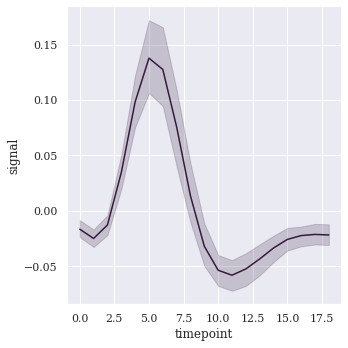

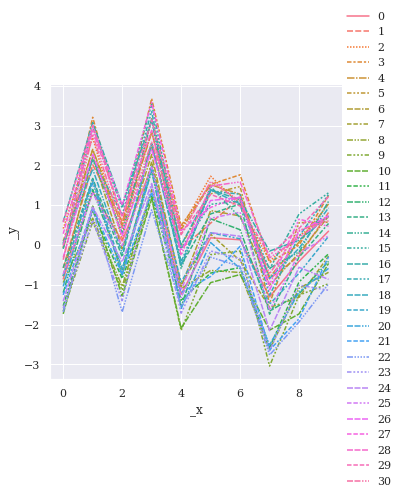

In [13]:
# Using Matplotlib to set figure size and Font style for our plot:
plt.rcParams['figure.figsize'] = (13.0, 8.0)
plt.rcParams['font.family'] = "serif"

# Declaring a linearly spaced variable with NumPy:
x = np.linspace(0, 15, 31)

# Creating linearly spaced dataset using our variable:
data = np.sin(x) + np.random.rand(10, 31) + np.random.randn(10, 1)
print(data)

fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

# Creating Time-Series plot:
ax = sns.relplot(data=data, kind="line", ci="sd")

# Labelling Axes:
ax.set_ylabel("Random Fluctuations")
ax.set_xlabel("Time Interval")


#https://seaborn.pydata.org/generated/seaborn.lineplot.html#seaborn.lineplot
#https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial    

Let us first try to understand this *random dataset* before infering what the plot displays. So we begin by creating a linearly spaced variable `x`, where `numpy.linspace()` takes in the `start`, `stop`, and `spacing` parameter; and outputs a vector of *31 digits* ranging from `0` to `15` at an interval of `0.5`. Then to create our dataset, we use `numpy.sin()` from *SciPy* to create an *element-wise array of trignometric sine* values. And for further distortion, we use `numpy.random.rand()` to *generate random samples* between `0` and `1`, as a *uniform distribution*. Once done creating dataset, we forward entire data to our **Seaborn Lineplot Plot** and what it displays is a trace with **translucent confidence interval bands**.

This [Confidence Interval band](https://www.mathbootcamps.com/interpreting-confidence-intervals/) of the mean depicts a range with an upper and lower number calculated from our dataset. Because the true population mean is unknown, this range describes possible values that the mean could be. If there had been multiple samples being drawn from the same population; and a 95% CI calculated for each sample, then we could expect the entire population mean to be found within 95% of these CIs. Always remember that these CIs are *very sensitive to variability* in the population (i.e. Spread of values) along with each sample size. I shall also attach a link in this notebook, if you want to study more on CIs.

Moving on, let us now check out the **parameters** available with Seaborn TS PLot for precision and customization. So the syntax looks like this:

`seaborn.tsplot(data, time=None, unit=None, condition=None, value=None, err_style='ci_band', ci=68, interpolate=True, color=None, estimator=<function mean>, n_boot=5000, err_palette=None, err_kws=None, legend=True, ax=None)`

Well it looks like we need to get acquainted with a lot of new parameters here so let us run through them one by one:

- Topping our list of parameters is `time`. This is used for the **time-format** variable from our dataset to get *drafted on X-axis*. In our example previously, we used *NumPy random function* to generate uniform values for our Time series.
- Next is `unit` parameter which comes handy if we have enough data, as in more than just a vector, unlike what we had. This is a field in our dataset that **identifies the Sampling unit**. A Sampling unit is one of the units into which an aggregate is divided for the purpose of sampling, each unit being regarded as individual and indivisible, when sample selection is made.
- Then we have `condition`, that is often used when we have a Series with a labels assigned, and thus for each label, a separate trace is plotted and accordingly forms our plot legend.
- We also have `err_style` that we can relate to from our previous lecture, that has fixed set of options within Seaborn to choose from like `ci_band`, `ci_bars`, etc. to **plot uncertainty** across `units`, corresponding to `X-axis`.
- This time our `ci` is by default at `68`, but ofcourse we can modify this parameter.
- `interpolate` helps us to do a **Linear Interpolation** between each timepoint and The value of this parameter also determines the marker used for the main plot traces (unless `marker` is specified as a keyword argument).

Those are actually the commonly used params so let us now start plotting, and slowly we would get adjusted to rest of the required parameters as well.

In [ ]:
# Importing another Built-in dataset:
gam = sns.load_dataset("gammas")

# Previewing Dataset:
gam.head(10)

Seaborn's built-in `gammas` is just a *fake compilation of raw magnetic resonance imaging (MRI)* dataset which is freely available online. We don't actually have to focus on *data analysis* part so let us instead try to get `subject` feature to our `X-axis` and accordingly plot `BOLD signal` datapoints on our `y-axis`.

In [ ]:
gam = sns.load_dataset("gammas")

#sns.tsplot(time="timepoint", value="BOLD signal", unit="subject", condition="ROI", data=gam)
sns.lineplot(x="timepoint", y="BOLD signal", hue="ROI", units="subject", data=gam, estimator=None,lw=1,
);

Here, the `time` component was picked from `timepoint` feature, hence labelled acordingly on `X-axis`. Separate traces using `condition` parameter have been plotted according to `ROI` feature of our Dataset, along with respective legends. If we don't want **Legend**, we may remove it by adding `legend=False`. We could have also altered *ci bandwidth color* using any of the **color** options supported by *Matplotlib*, like our pre-defined `tableau_20` colors. Let us use few more params:

<AxesSubplot:>

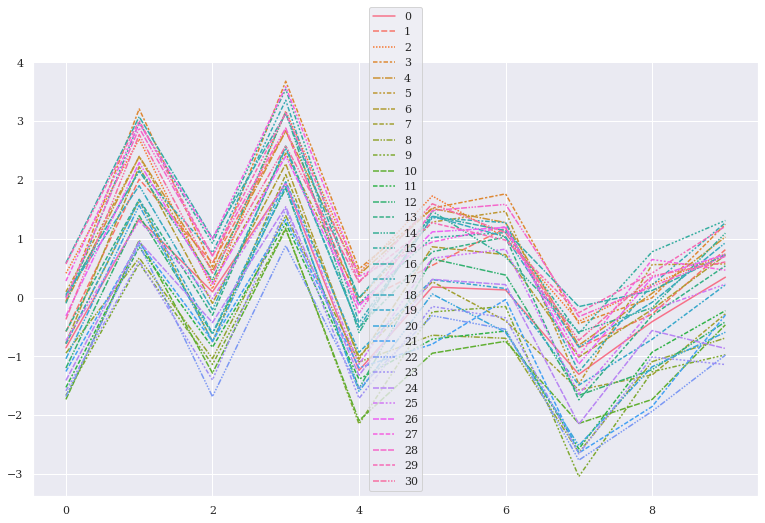

In [14]:
# We're gonna use built-in 'data' again:
#sns.tsplot(data=data, err_style="ci_bars")

# Let us now remove interpolation between datapoints & select a range for our Confidence band:
sns.lineplot(data=data, err_style="bars", ci=[68], estimator=np.median)

Let us now try to get each **bootstrap resampling** done:

In [15]:
sns.set(style="whitegrid", palette="icefire")

sns.tsplot(data=data, err_style="boot_traces", interpolate=False, estimator=np.median, n_boot=500)

AttributeError: module 'seaborn' has no attribute 'tsplot'

`err_style` parameter here gives us a pretty powerful tool for **Bootstrapping**, which is again a *statistical technique* that falls under the broader heading of **Resampling**. This technique involves a *relatively simple procedure* but repeated so many times that we require computers to compute, as visible in our plot with multiple separate traces. This *Bootstrapping* provides a method **other than Confidence Intervals** to estimate a population parameter. Let us try to plot with another modification to `err_style` which is our utmost critical parameter:

Text(0.5, 0, 'Time Interval')

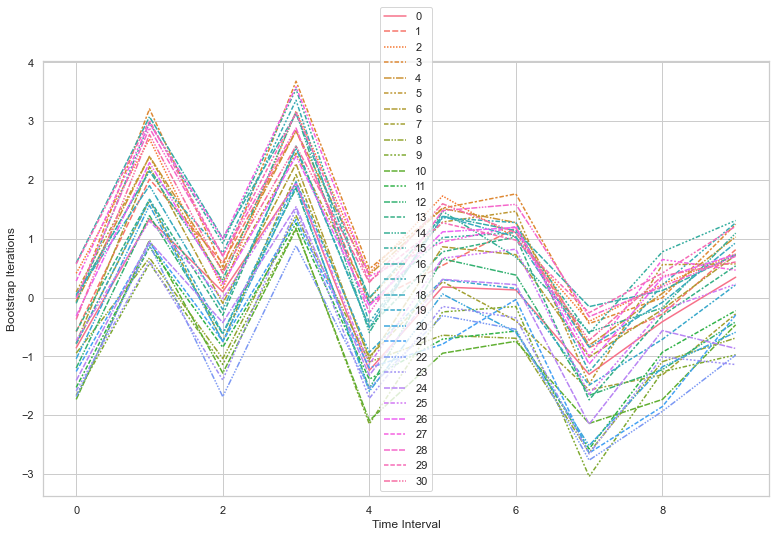

In [16]:
ax = sns.lineplot(data=data, err_style="band", estimator=np.median, n_boot=1000)

# Labelling Axes:
ax.set_ylabel("Bootstrap Iterations")
ax.set_xlabel("Time Interval")

It is our `n_boot` parameter which is controlling the number of bootstrap operations here, thus showing trace from each sampling unit. We may add `interpolate=False` and the line shall become dotted to avoid representation as a **Linear interpolation**. 

With **Seaborn Time Series plot**, you always need to be careful about the fact that the assumptions it makes about the *Input data* are that you've sampled the *same units at each timepoint* (although you can have missing timepoints for some units). 

For example, say you measured blood pressure from the same group of people every day for a month, and now you want to plot average blood pressure by condition (where maybe the `condition` variable is the *Type of diet* they are on). `tsplot` could do this, with a call that would look something like 
`sns.tsplot(df, time="day", unit="person", condition="diet", value="blood_pressure")`

But now, let me *create a random DataFrame* for you to help you understand on what type of dataset, **TS Plot** won't be efficient for you.

With **Seaborn Time Series** plot, you always need to be careful about the fact that the assumptions it makes about the Input data are that you've sampled the same units at each timepoint (although you can have missing timepoints for some units).

For example, say you measured blood pressure from the same group of people every day for a month, and now you want to plot average blood pressure by `condition` (where maybe the condition variable is the *Type of Diet* they are on). `tsplot` could do this, with a call that would look something like 
`sns.tsplot(df, time="day", unit="person", condition="diet", value="blood_pressure")`

But for large groups of people on different diets, and each day randomly sampling few people from segregated groups and measuring their blood pressure, **TS Plot** won't be a great choice. In such scenarios, you would either require other ways mentioned earlier to plot using customizable options of *Matplotlib*.

And with that, we shall conclude our discussion on **Time-Series** and **Letter-Value Plot**. Ou next topic is going to be more specifically on **Grids**. Meanwhile today I am going to assign you a homework that you need to complete on your own. This assignment would majorly focus on the skills that you gained in today's lecture. 

I shall attach a dataset named **<span style="color:red">"nyc_taxi.csv"</span>**, that is going to be in your **Resources folder**. This dataset is based on the [2016 NYC Yellow Cab trip record data](https://cloud.google.com/bigquery/public-data/nyc-tlc-trips), made available in *Big Query* on *Google Cloud Platform*. It was originally published by the NYC Taxi and Limousine Commission (TLC) and it's cleansed form has been attached for you to work upon. At the end of this *Lecture notebook*, you shall find description of all the fields in this dataset. Also a link to original *Google Big Query dataset* has been also attached, just in case you wish to check. 

- `id` - a unique identifier for each trip
- `vendor_id` - a code indicating the provider associated with the trip record
- `pickup_datetime` - date and time when the meter was engaged
- `dropoff_datetime` - date and time when the meter was disengaged
- `passenger_count` - the number of passengers in the vehicle (driver entered value)
- `pickup_longitude` - the longitude where the meter was engaged
- `pickup_latitude` - the latitude where the meter was engaged
- `dropoff_longitude` - the longitude where the meter was disengaged
- `dropoff_latitude` - the latitude where the meter was disengaged
- `store_and_fwd_flag` - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
- `trip_duration` - duration of the trip in seconds

